In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/kaggle competetion/KMeans.csv")

In [3]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
x = df.iloc[:,[1,2]]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = "k-means++",random_state = None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

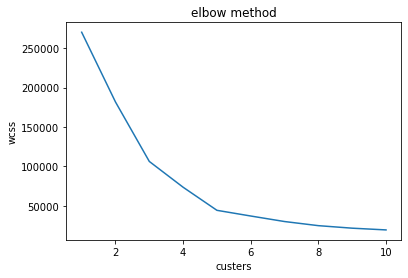

In [7]:
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("custers")
plt.ylabel("wcss")
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 5, init = "k-means++",random_state=0)
x["cluster"] = kmeans.fit_predict(x)

In [9]:
x


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [10]:
pd.DataFrame(y_means)

NameError: name 'y_means' is not defined

No handles with labels found to put in legend.


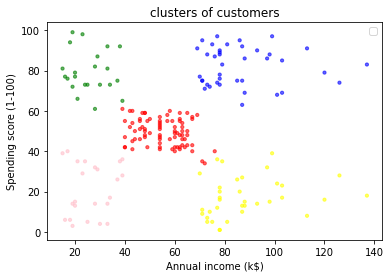

In [12]:
# get the centroinds
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
x['cen_x'] = x.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
x['cen_y'] = x.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})
# define and map colors
colors = ['red', 'green', 'blue', 'pink', 'yellow']
x['c'] = x.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'], c=x.c, alpha = 0.6, s=10)
plt.title("clusters of customers")
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show()